In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

In [2]:
model_i = gs.ReactionModel(
                        species={'protein': 0}, 

                        propensities={
                                        'kr': 100, 
                                        'gamma': 10}, 

                        reactions={
                                    'translation': ['kr'], 
                                    'degradation': ['gamma', 'protein']}, 

                        q={
                            'translation': {'create': ['protein']}, 
                            'degradation': {'destroy': ['protein']}}
                        )
            
model = gs.Gillespie(tmax=600, sampling_time = 10, reaction_model = model_i, model_name='./simulation_data/model_I', cells=1)
model.simulate()

100%|██████████| 1/1 [00:04<00:00,  4.00s/it]


In [112]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

TMG = 10

def burst(permease, mrna):
    return permease + 100

def beta(tmg, permease):
    tmg = tmg
    b = 0.00123 * pow(tmg, 0.6)
    return b * permease

def exclusion(eTMG, iTMG):
    return (iTMG/eTMG)**2 if eTMG > 0 else 0


lac_I_model = gs.ReactionModel(
                
                species={   
                            'eTMG': TMG,
                            'iTMG': 0, 
                            
                            'mRNA': 0, 
                            'permease': 0,

                            'LacI': 0,

                            'promoter': 1,
                            'promoter_off': 0,

                            'beta': 0,
                            'exclusion': 0
                            }, 

                propensities={
                                'kc_mRNA': 1.5, 
                                
                                'gamma_mRNA': np.log(2)/2.5,
                                'gamma_permease': np.log(2)/30,

                                'kc_lacI': 0.7,
                                'kd_lacI': 0.1,

                                'kd_TMG_LacI': 5,

                                'promoter_on_k': 0.0035,
                                'promoter_off_k': 0.0035
                                },
                reactions={
                            'TMG_inclusion': ['beta'],  
                            'TMG_exclusion': ['exclusion'],

                            'transcription_mRNA': ['kc_mRNA', 'promoter'],
                            'mRNA_deg': ['gamma_mRNA', 'mRNA'],
                            
                            'permease_dergadation': ['gamma_permease', 'permease'],

                            'LacI_synthesis': ['kc_lacI'],
                            'deg_LacI': ['kd_lacI', 'LacI'],

                            'LacI_inhibition': ['kd_TMG_LacI', 'iTMG', 'LacI'],

                            's_promoter_off': ['promoter_off_k', 'LacI' ,'promoter'],
                            's_promoter_on': ['promoter_on_k','promoter_off']
                    },
                q={
                    'TMG_inclusion': {'create' : ['iTMG'],  'destroy' : ['eTMG']},
                    'TMG_exclusion': {'create' : ['eTMG'],  'destroy' : ['iTMG']},

                    'transcription_mRNA': {'create_rna'    : ['mRNA'], 'burst': ['permease']},
                    'mRNA_deg':           {'destroy'   : ['mRNA']},
                    
                    'permease_dergadation': {'destroy' : ['permease']},

                    'LacI_synthesis' : {'create': ['LacI']},
                    'deg_LacI': {'destroy': ['LacI']},

                    'LacI_inhibition': {'destroy': ['LacI']},

                    's_promoter_off': {'deactivate': ['promoter'], 'activate': ['promoter_off']},
                    's_promoter_on':  {'activate':  ['promoter'], 'deactivate': ['promoter_off']}
                },

                math_model = {
                                # 'permease': burst,
                                'beta': beta,
                                'exclusion': exclusion
                            },
                parameters={
                                # 'permease': ['permease', 'mRNA'], 
                                'beta':['eTMG', 'permease'],
                                'exclusion': ['eTMG', 'iTMG']
                                }
                # exclude_from_division= ['eTMG']  

                )

tmax = 3000
cells = 1
sampling_time = 1

model = gs.Gillespie(tmax=tmax, sampling_time = sampling_time, reaction_model = lac_I_model, model_name=f'lacI_model_{40}', cells=1, burst=15)
model.simulate()
# model.simulate_division(model='adder')



100%|██████████| 1/1 [00:13<00:00, 13.77s/it]


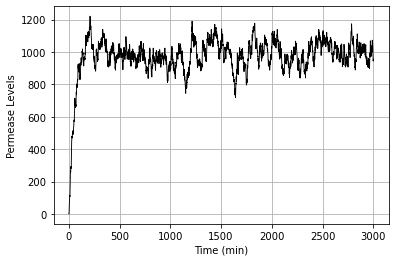

In [113]:
df = pd.read_csv(f'lacI_model_{40}.csv', delimiter='|')
for cell in range(100):
    plt.plot(df.time[df.cell == cell], df.permease[df.cell == cell], 'k-', ms=0.9, lw=0.9, label='Permease')
    plt.xlabel('Time (min)')
    plt.ylabel('Permease Levels')
    # plt.title('Permease Expression (40 µM TMG)')
plt.grid(True)
# plt.legend(loc=5)

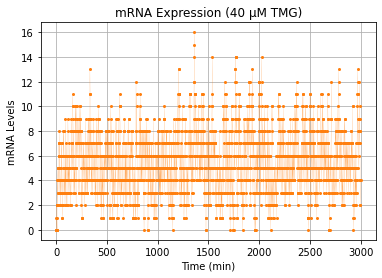

In [114]:
df = pd.read_csv(f'lacI_model_{40}.csv', delimiter='|')
for cell in range(5):
    plt.plot(df.time[df.cell == cell], df.mRNA[df.cell == cell], 'o-', ms=2, lw=0.1, label='mRNA')
    plt.xlabel('Time (min)')
    plt.ylabel('mRNA Levels')
    plt.title('mRNA Expression (40 µM TMG)')
plt.grid(True)
# plt.legend(loc=5)

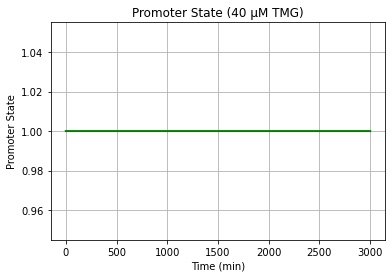

In [115]:
df = pd.read_csv(f'lacI_model_{40}.csv', delimiter='|')
for cell in range(100):
    plt.plot(df.time[df.cell == cell], df.promoter[df.cell == cell], 'g-', ms=0.9, lw=2, label='Promoter')
    plt.xlabel('Time (min)')
    plt.ylabel('Promoter State')
    plt.title('Promoter State (40 µM TMG)')
plt.grid(True)
# plt.legend(loc=5)

In [116]:
df = pd.read_csv(f'lacI_model_{40}.csv', delimiter='|')
df_2 = df.time[df.promoter == 1]
# plt.hist(df, bins=30);
df_2.size

3001

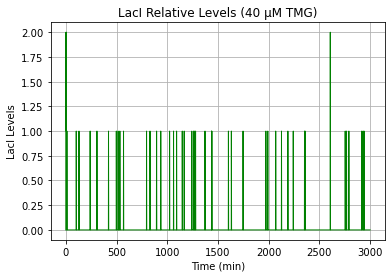

In [117]:
df = pd.read_csv(f'lacI_model_{40}.csv', delimiter='|')
for cell in range(100):
    plt.plot(df.time[df.cell == cell], df.LacI[df.cell == cell], 'g-', ms=0.9, lw=1, label='LacI')
    plt.xlabel('Time (min)')
    plt.ylabel('LacI Levels')
    plt.title('LacI Relative Levels (40 µM TMG)')
plt.grid(True)
# plt.legend(loc=5)

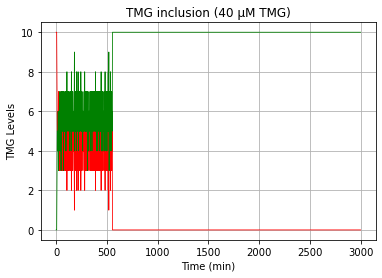

In [118]:
df = pd.read_csv(f'lacI_model_{40}.csv', delimiter='|')
for cell in range(100):
    plt.plot(df.time[df.cell == cell], df.eTMG[df.cell == cell], 'r-', ms=0.9, lw=0.8, label='Extracellular TMG')
    plt.plot(df.time[df.cell == cell], df.iTMG[df.cell == cell], 'g-', ms=0.9, lw=0.8, label='Intracellular TMG')
    plt.xlabel('Time (min)')
    plt.ylabel('TMG Levels')
    plt.title('TMG inclusion (40 µM TMG)')
plt.grid(True)
# plt.legend(loc=5)